In [26]:
%matplotlib notebook
%matplotlib inline
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import axes3d

from IPython.display import clear_output

import pandas as pd
import numpy as np
classes = {0:'T-shirt/top',
           1:'Trouser', 
           2: 'Pullover', 
           3: 'Dress', 
           4: 'Coat',
           5: 'Sandal',
           6: 'Shirt',
           7: 'Sneaker',
           8: 'Bag', 
           9: 'Ankle Boot'}

In [27]:
selected_labels = [0, 1, 5, 8, 9]

data = pd.read_csv(r"C:\Users\diyap\Downloads\fashion-mnist.csv\fashion-mnist_train.csv")
data = data.loc[data['label'].isin(selected_labels)].reset_index(drop=True)

labels = data.pop('label')
index = 0
data = data.values
images = np.reshape(data, (-1, 28, 28))

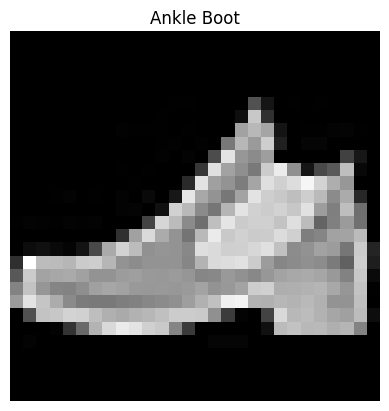

In [28]:
import matplotlib.pyplot as plt
plt.imshow(images[index].squeeze(), cmap = 'gray')
plt.title(classes[labels[index]])
plt.axis('off')
plt.show()
index += 1

# Scale the Data:

In [29]:
mean_ = data.mean(axis =0)
std_ = data.std(axis=0)

X_scaled = (data-mean_)/std_

# Calculate Covariance Matrix:

In [30]:
print(f'Shape of X_scaled: {X_scaled.shape}')
features = X_scaled.T
print(f'Shape of features: {features.shape}')
cov_matrix = np.cov(features)
print(f'Shape of cov_matrix: {cov_matrix.shape}')
print('\nSneak Peak of the covariance matrix:\n')
cov_matrix[0:5, 0:5]

Shape of X_scaled: (30000, 784)
Shape of features: (784, 30000)
Shape of cov_matrix: (784, 784)

Sneak Peak of the covariance matrix:



array([[1.00003333, 0.10344873, 0.02532451, 0.02635544, 0.0259777 ],
       [0.10344873, 1.00003333, 0.67948885, 0.16289888, 0.05367159],
       [0.02532451, 0.67948885, 1.00003333, 0.29368204, 0.0353962 ],
       [0.02635544, 0.16289888, 0.29368204, 1.00003333, 0.55370309],
       [0.0259777 , 0.05367159, 0.0353962 , 0.55370309, 1.00003333]])

In [31]:
eig_values, eig_vectors = np.linalg.eig(cov_matrix)
print(f'First 10 eigenvalues: {eig_values[:10]}')
print(f'\n\nLast 10 eigenvalues: {eig_values[-10:]}')

First 10 eigenvalues: [153.06599858 134.58513832  53.62624634  45.83523074  35.94793614
  27.1722212   16.16894956  11.26325146   9.89960743   8.76881916]


Last 10 eigenvalues: [0.03123221 0.02958344 0.03232823 0.03207515 0.03047201 0.03218829
 0.02955674 0.03128741 0.03185936 0.03836895]


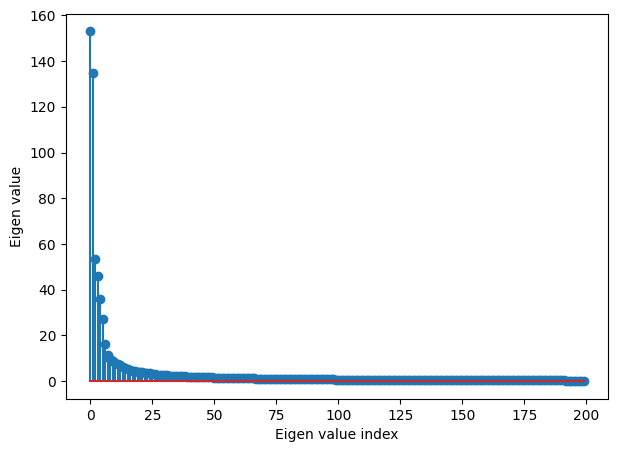

In [32]:
plt.figure(figsize=(7,5))
plt.stem(eig_values[:200])  # Removed use_line_collection
plt.xlabel('Eigen value index')
plt.ylabel('Eigen value')
plt.show()

In [33]:
for i in range(200):
    exp_var = np.sum(eig_values[:i+1])*100 / np.sum(eig_values)
    print(f'Eigenvectors upto {i+1} expresses {exp_var} % variance')

Eigenvectors upto 1 expresses 19.52307351819954 % variance
Eigenvectors upto 2 expresses 36.688973027415884 % variance
Eigenvectors upto 3 expresses 43.52882746554155 % variance
Eigenvectors upto 4 expresses 49.374963038968396 % variance
Eigenvectors upto 5 expresses 53.9600061353976 % variance
Eigenvectors upto 6 expresses 57.425735147930126 % variance
Eigenvectors upto 7 expresses 59.488032417703955 % variance
Eigenvectors upto 8 expresses 60.924623746428374 % variance
Eigenvectors upto 9 expresses 62.18728668600388 % variance
Eigenvectors upto 10 expresses 63.30572123534586 % variance
Eigenvectors upto 11 expresses 64.34015921745103 % variance
Eigenvectors upto 12 expresses 65.303453770063 % variance
Eigenvectors upto 13 expresses 66.2215767242117 % variance
Eigenvectors upto 14 expresses 66.99535115019923 % variance
Eigenvectors upto 15 expresses 67.74056613252277 % variance
Eigenvectors upto 16 expresses 68.43816735826341 % variance
Eigenvectors upto 17 expresses 69.06144815928648

# Visualizations
## Eigenvector Visualization

In [34]:
X_scaled[0].reshape((-1, 784)).shape

(1, 784)

In [35]:
eig_vectors[:, 0].reshape((784, -1)).shape

(784, 1)

In [36]:
result = np.dot(X_scaled.reshape((-1, 784)), eig_vectors[:,:50].reshape((784, -1)))
result.shape

(30000, 50)

In [37]:
projected_1 = X_scaled.dot(eig_vectors.T[0])
projected_2 = X_scaled.dot(eig_vectors.T[1])
res2d = pd.DataFrame(projected_1, columns=['PC1'])
res2d['PC2'] = projected_2
res2d['Y'] = labels
res2d.head()

,PC1,PC2,Y
0,-13.846035,-3.141500,9
1,13.780054,8.119654,0
2,-4.080987,-20.163169,5
3,4.344533,0.808241,8
4,21.412902,19.844596,0


## 2D Visualization

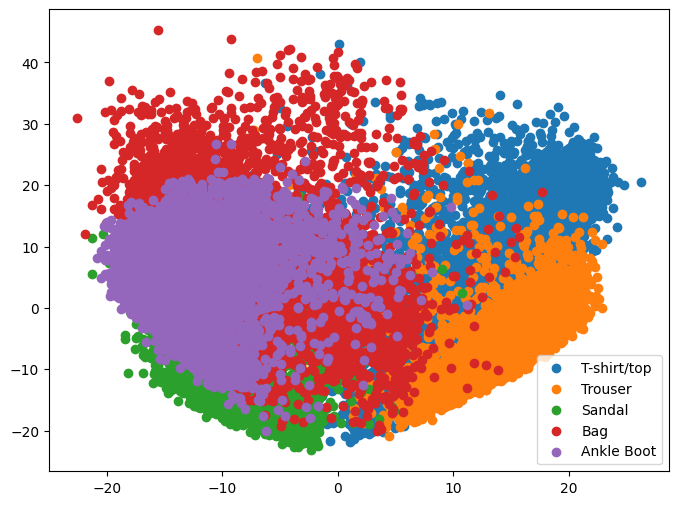

In [38]:
plt.figure(figsize=(8,6))
for label in selected_labels:
    label_name = classes[label]
    coords = res2d[res2d['Y']==label]
    x = coords['PC1'].values
    y = coords['PC2'].values
    plt.scatter(x, y, label=label_name)

plt.legend()
plt.show()

## 3D Visualization

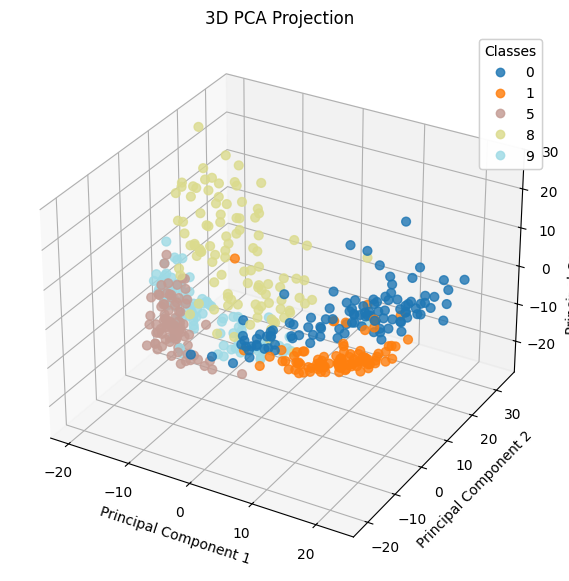

In [39]:
fig = plt.figure(figsize=(10, 7))
ax = fig.add_subplot(111, projection='3d')

# 3D scatter plot
scatter = ax.scatter(
    res3d['PC1'], res3d['PC2'], res3d['PC3'],
    c=res3d['Y'], cmap='tab20', s=40, alpha=0.8
)

# Axes labels
ax.set_xlabel('Principal Component 1')
ax.set_ylabel('Principal Component 2')
ax.set_zlabel('Principal Component 3')
ax.set_title('3D PCA Projection')

# Optional: Add legend if labels are discrete categories
legend1 = ax.legend(*scatter.legend_elements(), title="Classes")
ax.add_artist(legend1)

plt.show()

In [40]:
reduced_eigen_space = eig_vectors[:, :350]

In [41]:
print(f'Shape of X_scaled: {X_scaled.shape}')
print(f'Shape of reduced_eigen_space: {reduced_eigen_space.shape}')
X_compressed = np.dot(X_scaled, reduced_eigen_space)
print(f'Shape of X_compressed: {X_compressed.shape}')

Shape of X_scaled: (30000, 784)
Shape of reduced_eigen_space: (784, 350)
Shape of X_compressed: (30000, 350)


In [42]:
print(f'Shape of X_compressed: {X_compressed.shape}')
print(f'Shape of reduced_eigen_space: {reduced_eigen_space.shape}')
X_reconstructed = np.dot(X_compressed,reduced_eigen_space.T)
print(f'Shape of X_reconstructed: {X_reconstructed.shape}')

Shape of X_compressed: (30000, 350)
Shape of reduced_eigen_space: (784, 350)
Shape of X_reconstructed: (30000, 784)


In [43]:
data_reconstructed = (X_reconstructed * std_ ) + mean_
reconstructed_images = np.reshape(data_reconstructed, (-1, 28, 28))

In [44]:
rec_index = 0

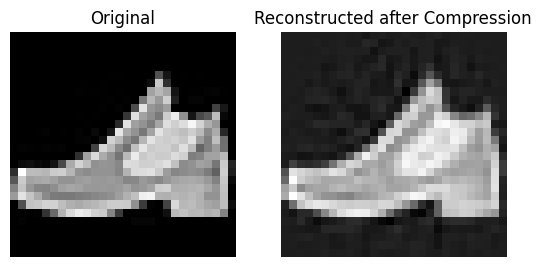

In [45]:
f = plt.figure()
ax1 = f.add_subplot(1,2,1)
plt.imshow(images[rec_index].squeeze(), cmap = 'gray')
ax1.axis(False)
ax2 = f.add_subplot(1,2,2)
ax2.axis(False)
plt.imshow(reconstructed_images[rec_index].squeeze(), cmap = 'gray')
ax1.title.set_text('Original')
ax2.title.set_text('Reconstructed after Compression')
plt.show(block=True)
rec_index +=1
